In [1]:
%load_ext autoreload
%autoreload 2

In [5]:
from reusable.gp import BuildGP_Gumbel
from reusable.kernels import esq_kernel
import numpyro
import jax.numpy as jnp
import jax.random as random
from numpyro.infer import Predictive


args = {
    "n" : 100,

    # GP prior configuration
    "gp_kernel": esq_kernel,
    "rng_key": random.PRNGKey(2),
}

args.update(
    {  # so we can use the definition of n to define x
        "x": jnp.arange(0, 1, 1/args["n"]),
        "length_prior_choice": "invgamma",
        "length_prior_arguments": {"concentration": 4.0, "rate": 1.0},
        "variance_prior_choice": "gamma",
        "variance_prior_arguments": {"concentration": 5.25, "rate": 0.5},
        "scoring_num_draws": 2000,
        "expcode": "22",
    }
)

rng_key, _ = random.split(random.PRNGKey(4))


rng_key, rng_key_train, rng_key_test = random.split(rng_key, 3)

gp = BuildGP_Gumbel(
    args["gp_kernel"],
    noise=False,
    length_prior_choice=args["length_prior_choice"],
    length_prior_args=args["length_prior_arguments"],
    variance_prior_choice=args["variance_prior_choice"],
    variance_prior_args=args["variance_prior_arguments"],
)


Mean: 0.6404781341552734, Variance: 264.3333740234375


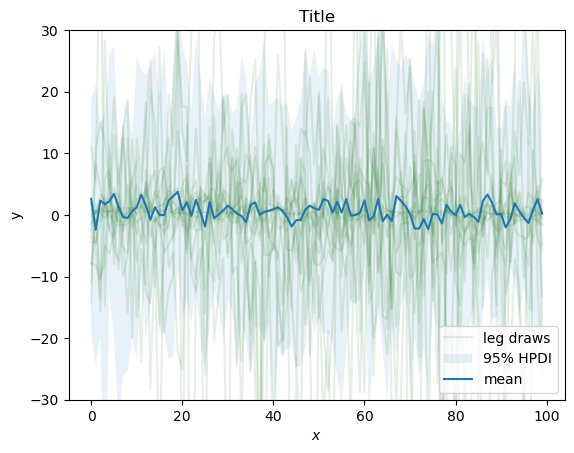

In [8]:
pred = Predictive(gp, num_samples=100)

samplesA = pred(rng_key_train, x=args["x"], gp_kernel=args["gp_kernel"], jitter=2e-6)["y"]
from plotting.plots import plot_draws, plot_draws_hpdi

plot_draws_hpdi(samplesA, jnp.arange(args["n"]), "Title", "y", "leg",  _min=-30, _max=30)

print(f"Mean: {jnp.mean(samplesA)}, Variance: {jnp.var(samplesA)}")

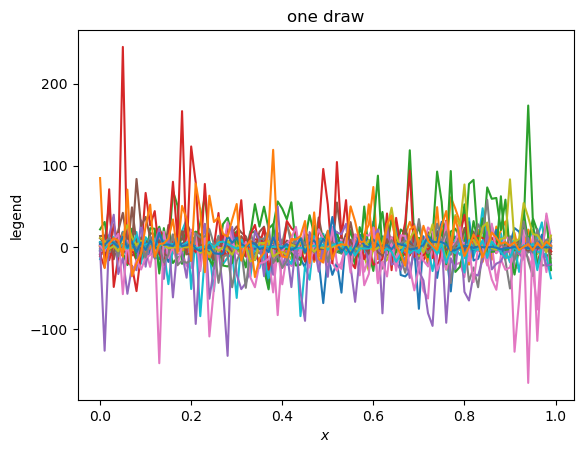

In [12]:
plot_draws(samplesA, args["x"], "one draw", "legend")